<a href="https://www.kaggle.com/code/hiroshi007/icc-t20-wc-2024-analysis?scriptVersionId=186696549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icc-mens-t20-worldcup/ICC Mens T20 Worldcup.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
plt.style.use("ggplot")

In [3]:
df=pd.read_csv("/kaggle/input/icc-mens-t20-worldcup/ICC Mens T20 Worldcup.csv")
df.head(10)

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Canada,United State Of America,Group A,United State Of America,Fielding,194,5,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,10,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi
2,3rd,"Sunday,June 2,2024","Kensington Oval, Bridgetown, Barbados",Oman,Namibia,Group B,Namibia,Fielding,109,10,...,Namibia,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese
3,4th,"Monday,June 3,2024","Nassau County International Cricket Stadium, N...",Sri Lanka,South Africa,Group D,Sri Lanka,Batting,77,10,...,South Africa,Normal Match,Wickets,6,Quinton de Kock,20,Anrich Nortje,4,7,Anrich Nortje
4,5th,"Monday,June 3,2024","Providence Stadium, Guyana",Afghanistan,Uganda,Group C,Uganda,Fielding,183,5,...,Afghanistan,Normal Match,Runs,125,Rahmanullah Gurbaz,76,Fazalhaq Farooqi,5,9,Fazalhaq Farooqi
5,6th,"Tuesday,June 4,2024","Kensington Oval, Bridgetown, Barbados",Scotland,England,Group B,Scotland,Batting,90,0,...,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain,Rain
6,7th,"Tuesday,June 4,2024","Grand Prairie Stadium, Dallas",Nepal,Netherlands,Group D,Netherlands,Fielding,106,10,...,Netherlands,Normal Match,Wickets,6,Max O'Dowd,54,Tim Pringle,3,20,Tim Pringle
7,8th,"Wednesday,June 5,2024","Nassau County International Cricket Stadium, N...",Ireland,India,Group A,India,Fielding,96,10,...,India,Normal Match,Wickets,8,Rohit Sharma,52,Jasprit Bumrah,2,6,Jasprit Bumrah
8,9th,"Wednesday,June 5,2024","Providence Stadium, Guyana",Papua New Guinea,Uganda,Group C,Uganda,Fielding,77,10,...,Uganda,Normal Match,Wickets,3,Riazat Ali Shah,33,Alpesh Ramjani,17,17,Riazat Ali Shah
9,10th,"Wednesday,June 5,2024","Kensington Oval, Bridgetown, Barbados",Australia,Oman,Group B,Oman,Fielding,164,5,...,Australia,Normal Match,Runs,39,Marcus Stoinis,67,Marcus Stoinis,3,19,Marcus Stoinis


In [4]:
print(df.columns)
df.info()

Index(['Match No.', 'Date', 'Venue', '1st Team', '2nd Team', 'Stage',
       'Toss Winning', 'Toss Decision', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings', 'Winners', 'Method', 'Won by',
       'Winning Margin', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date                               55 non-null     object
 2   Venue                              55 non-null     object
 3   1st Team                           55 non-null     object
 4   2nd Team                           55 no

In [5]:
col=['Match No.', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings',
       'Winning Margin', 'Highest Score',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)']
df[col]=df[col].apply(pd.to_numeric,errors="coerce")

In [6]:
df.columns

Index(['Match No.', 'Date', 'Venue', '1st Team', '2nd Team', 'Stage',
       'Toss Winning', 'Toss Decision', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings', 'Winners', 'Method', 'Won by',
       'Winning Margin', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match'],
      dtype='object')

In [7]:
df[["Day","date"]]=df["Date"].str.split(",",expand=True,n=1)

In [8]:
print(df.isnull().sum())

Match No.                            55
Date                                  0
Venue                                 0
1st Team                              0
2nd Team                              0
Stage                                 0
Toss Winning                          0
Toss Decision                         0
First Innings Score                   3
Fall of wickets First Innings         3
Second Innings Score                  4
Fall of wickets Second Innings        4
Winners                               0
Method                                0
Won by                                0
Winning Margin                        4
Top Scorer                            0
Highest Score                         4
Best Bowler                           0
Best Bowler Figure(Wickets Taken)     4
Best Bowler Figure(Runs Recieved)     4
Player Of The Match                   0
Day                                   0
date                                  0
dtype: int64


In [9]:

df.drop(["Date","Match No.","Venue","Stage","Day"],axis=1,inplace=True)
df.head(10)

,1st Team,2nd Team,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,Second Innings Score,Fall of wickets Second Innings,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match,date
0,Canada,United State Of America,United State Of America,Fielding,194.0,5.0,197.0,3.0,United State Of America,Normal Match,Wickets,7.0,Aaron Jones,94.0,Dilon Heyliger,1.0,19.0,Aaron Jones,"June 1,2024"
1,Papua New Guinea,Afghanistan,Afghanistan,Fielding,95.0,10.0,101.0,3.0,Afghanistan,Normal Match,Wickets,7.0,Gulbadin Naib,49.0,Fazalhaq Farooqi,3.0,16.0,Fazalhaq Farooqi,"June 2,2024"
2,Oman,Namibia,Namibia,Fielding,109.0,10.0,109.0,6.0,Namibia,Normal Match,Wickets,4.0,Jan Frylinck,45.0,Mehran Khan,3.0,7.0,David Wiese,"June 2,2024"
3,Sri Lanka,South Africa,Sri Lanka,Batting,77.0,10.0,80.0,4.0,South Africa,Normal Match,Wickets,6.0,Quinton de Kock,20.0,Anrich Nortje,4.0,7.0,Anrich Nortje,"June 3,2024"
4,Afghanistan,Uganda,Uganda,Fielding,183.0,5.0,58.0,10.0,Afghanistan,Normal Match,Runs,125.0,Rahmanullah Gurbaz,76.0,Fazalhaq Farooqi,5.0,9.0,Fazalhaq Farooqi,"June 3,2024"
5,Scotland,England,Scotland,Batting,90.0,0.0,NaN,NaN,Rain,Rain,Rain,NaN,Rain,NaN,Rain,NaN,NaN,Rain,"June 4,2024"
6,Nepal,Netherlands,Netherlands,Fielding,106.0,10.0,109.0,4.0,Netherlands,Normal Match,Wickets,6.0,Max O'Dowd,54.0,Tim Pringle,3.0,20.0,Tim Pringle,"June 4,2024"
7,Ireland,India,India,Fielding,96.0,10.0,97.0,2.0,India,Normal Match,Wickets,8.0,Rohit Sharma,52.0,Jasprit Bumrah,2.0,6.0,Jasprit Bumrah,"June 5,2024"
8,Papua New Guinea,Uganda,Uganda,Fielding,77.0,10.0,78.0,8.0,Uganda,Normal Match,Wickets,3.0,Riazat Ali Shah,33.0,Alpesh Ramjani,17.0,17.0,Riazat Ali Shah,"June 5,2024"
9,Australia,Oman,Oman,Fielding,164.0,5.0,125.0,9.0,Australia,Normal Match,Runs,39.0,Marcus Stoinis,67.0,Marcus Stoinis,3.0,19.0,Marcus Stoinis,"June 5,2024"


In [10]:
df.loc[df["Method"]=="Rain"]

,1st Team,2nd Team,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,Second Innings Score,Fall of wickets Second Innings,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match,date
5,Scotland,England,Scotland,Batting,90.0,0.0,NaN,NaN,Rain,Rain,Rain,NaN,Rain,NaN,Rain,NaN,NaN,Rain,"June 4,2024"
22,Nepal,Sri Lanka,Rain,Rain,NaN,NaN,NaN,NaN,Rain,Rain,Rain,NaN,Rain,NaN,Rain,NaN,NaN,Rain,"June 11,2024"
29,United State Of America,Ireland,Rain,Rain,NaN,NaN,NaN,NaN,Rain,Rain,Rain,NaN,Rain,NaN,Rain,NaN,NaN,Rain,"June 14,2024"
32,Canada,India,Rain,Rain,NaN,NaN,NaN,NaN,Rain,Rain,Rain,NaN,Rain,NaN,Rain,NaN,NaN,Rain,"June 15,2024"


In [11]:
df=df[df["Method"]!="Rain"]
df=df.reset_index().drop(["index","Method","Won by"],axis=1)
df.head()

,1st Team,2nd Team,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,Second Innings Score,Fall of wickets Second Innings,Winners,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match,date
0,Canada,United State Of America,United State Of America,Fielding,194.0,5.0,197.0,3.0,United State Of America,7.0,Aaron Jones,94.0,Dilon Heyliger,1.0,19.0,Aaron Jones,"June 1,2024"
1,Papua New Guinea,Afghanistan,Afghanistan,Fielding,95.0,10.0,101.0,3.0,Afghanistan,7.0,Gulbadin Naib,49.0,Fazalhaq Farooqi,3.0,16.0,Fazalhaq Farooqi,"June 2,2024"
2,Oman,Namibia,Namibia,Fielding,109.0,10.0,109.0,6.0,Namibia,4.0,Jan Frylinck,45.0,Mehran Khan,3.0,7.0,David Wiese,"June 2,2024"
3,Sri Lanka,South Africa,Sri Lanka,Batting,77.0,10.0,80.0,4.0,South Africa,6.0,Quinton de Kock,20.0,Anrich Nortje,4.0,7.0,Anrich Nortje,"June 3,2024"
4,Afghanistan,Uganda,Uganda,Fielding,183.0,5.0,58.0,10.0,Afghanistan,125.0,Rahmanullah Gurbaz,76.0,Fazalhaq Farooqi,5.0,9.0,Fazalhaq Farooqi,"June 3,2024"


In [12]:
df["1st Team"].unique()

array(['Canada', 'Papua New Guinea', 'Oman', 'Sri Lanka', 'Afghanistan',
       'Nepal', 'Ireland', 'Australia', 'Pakistan', 'Namibia',
       'Netherlands', 'West Indies', 'India', 'South Africa',
       'United State Of America', 'Bangladesh', 'Uganda', 'England',
       'Scotland'], dtype=object)

In [13]:
df

,1st Team,2nd Team,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,Second Innings Score,Fall of wickets Second Innings,Winners,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match,date
0,Canada,United State Of America,United State Of America,Fielding,194.0,5.0,197.0,3.0,United State Of America,7.0,Aaron Jones,94.0,Dilon Heyliger,1.0,19.0,Aaron Jones,"June 1,2024"
1,Papua New Guinea,Afghanistan,Afghanistan,Fielding,95.0,10.0,101.0,3.0,Afghanistan,7.0,Gulbadin Naib,49.0,Fazalhaq Farooqi,3.0,16.0,Fazalhaq Farooqi,"June 2,2024"
2,Oman,Namibia,Namibia,Fielding,109.0,10.0,109.0,6.0,Namibia,4.0,Jan Frylinck,45.0,Mehran Khan,3.0,7.0,David Wiese,"June 2,2024"
3,Sri Lanka,South Africa,Sri Lanka,Batting,77.0,10.0,80.0,4.0,South Africa,6.0,Quinton de Kock,20.0,Anrich Nortje,4.0,7.0,Anrich Nortje,"June 3,2024"
4,Afghanistan,Uganda,Uganda,Fielding,183.0,5.0,58.0,10.0,Afghanistan,125.0,Rahmanullah Gurbaz,76.0,Fazalhaq Farooqi,5.0,9.0,Fazalhaq Farooqi,"June 3,2024"
5,Nepal,Netherlands,Netherlands,Fielding,106.0,10.0,109.0,4.0,Netherlands,6.0,Max O'Dowd,54.0,Tim Pringle,3.0,20.0,Tim Pringle,"June 4,2024"
6,Ireland,India,India,Fielding,96.0,10.0,97.0,2.0,India,8.0,Rohit Sharma,52.0,Jasprit Bumrah,2.0,6.0,Jasprit Bumrah,"June 5,2024"
7,Papua New Guinea,Uganda,Uganda,Fielding,77.0,10.0,78.0,8.0,Uganda,3.0,Riazat Ali Shah,33.0,Alpesh Ramjani,17.0,17.0,Riazat Ali Shah,"June 5,2024"
8,Australia,Oman,Oman,Fielding,164.0,5.0,125.0,9.0,Australia,39.0,Marcus Stoinis,67.0,Marcus Stoinis,3.0,19.0,Marcus Stoinis,"June 5,2024"
9,Pakistan,United State Of America,United State Of America,Fielding,159.0,7.0,160.0,3.0,United State Of America,1.0,Monank Patel,50.0,Nosthush Kenjige,30.0,30.0,Monank Patel,"June 6,2024"


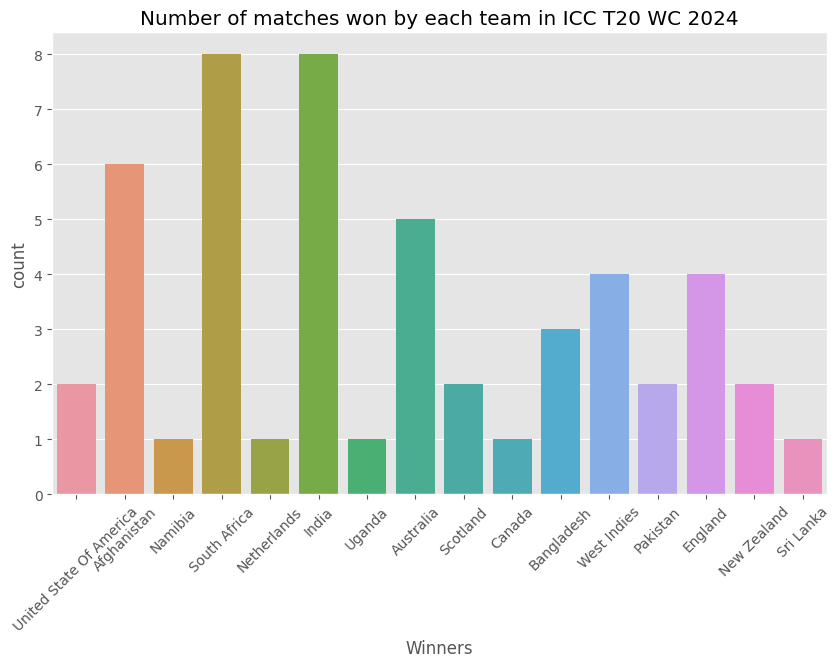

In [14]:
df_inn_score=df.groupby(["1st Team","2nd Team"]).mean(numeric_only=True).reset_index()
# fig,ax=plt.subplots(2,2,figsize=(12,6))
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df["Winners"])
plt.title("Number of matches won by each team in ICC T20 WC 2024")
plt.xticks(rotation=45)

plt.show()


As per the graph *South Africa* and *India* won the highest number of matches.

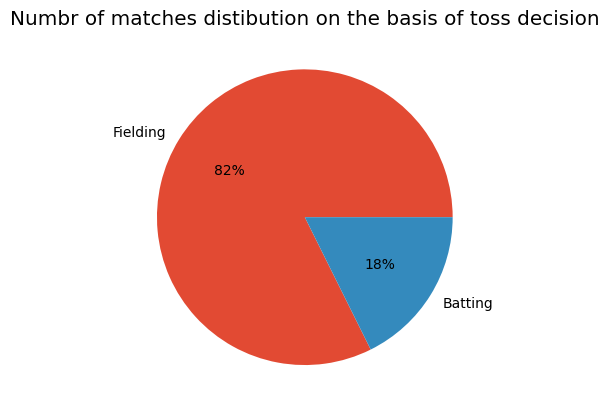

In [15]:
toss=df["Toss Decision"].value_counts()
labels=toss.index
values=toss.values
plt.pie(x=values,labels=labels,autopct='%.0f%%')
plt.title("Numbr of matches distibution on the basis of toss decision")
plt.show()

As per the graph, 82% of the matches the toss decion was to field first while 18% matches had a batting first option

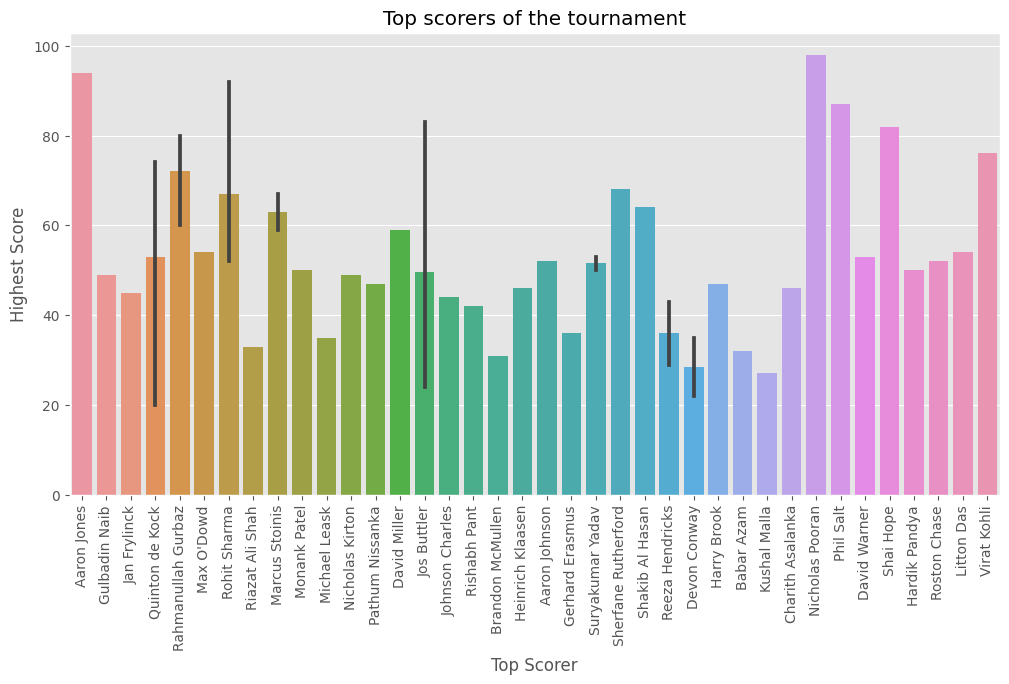

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=df["Top Scorer"],y=df["Highest Score"])
plt.xticks(rotation=90)
plt.title("Top scorers of the tournament")
plt.show()

As per the graph, Nicholar pooran ,Rohit Sharma, and Aaron james were the top scorer batsmen in the tournament

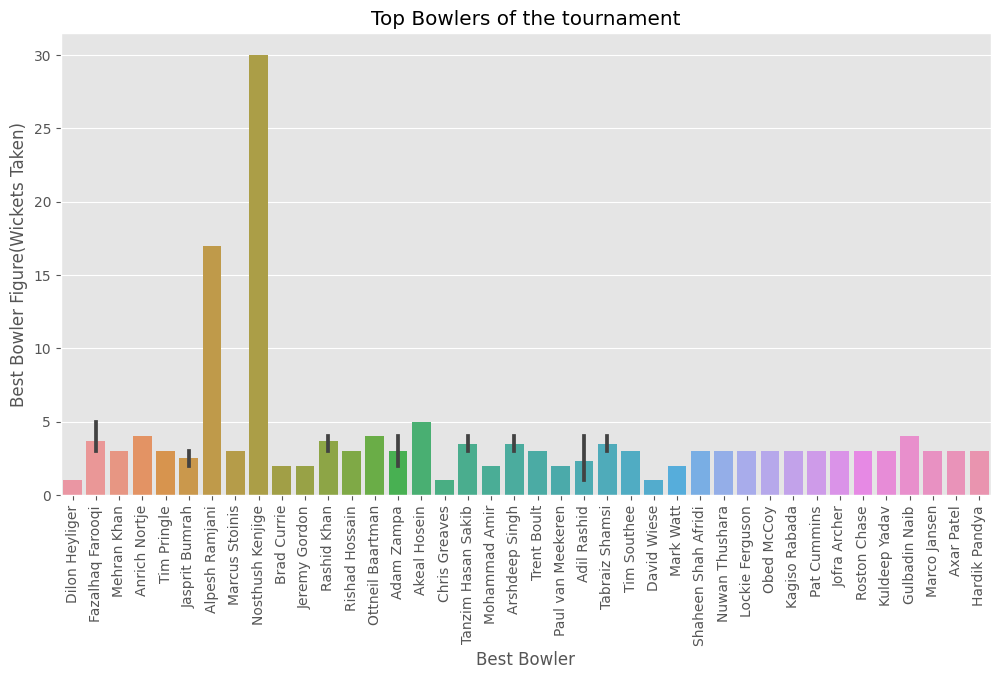

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=df["Best Bowler"],y=df["Best Bowler Figure(Wickets Taken)"])
plt.xticks(rotation=90)
plt.title("Top Bowlers of the tournament")
plt.show()

Clearly , here the values for nosthush kenjige and alpesh ramjani are outliers and may be a mistake in the dataset. Apart from these two ,Fazalhaq farooqi and akeal hosein were the top bowlers in the tournamnet

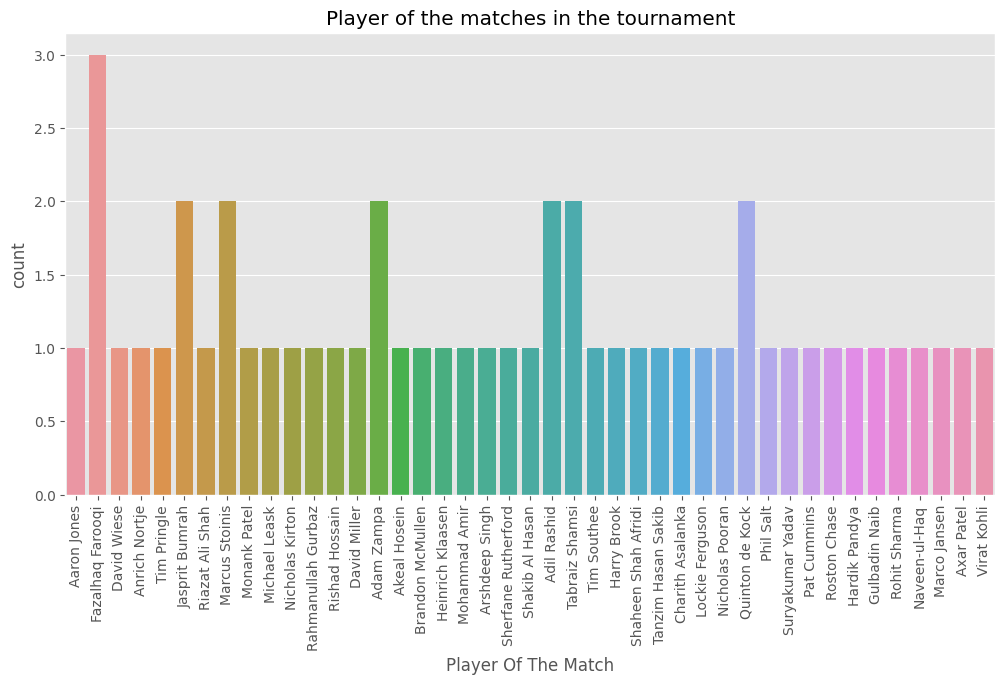

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=df["Player Of The Match"])
plt.title("Player of the matches in the tournament")
plt.xticks(rotation=90)
plt.show()

as per the graph, **Fazalhaq Farooqi** was the player of the match 3 times throughout the tournament while **Jasprit Bumrah,Marcus Stoinois,Adam Zampa,Adil Rashid,De Kock,Shamsi** were 2 times player of the match

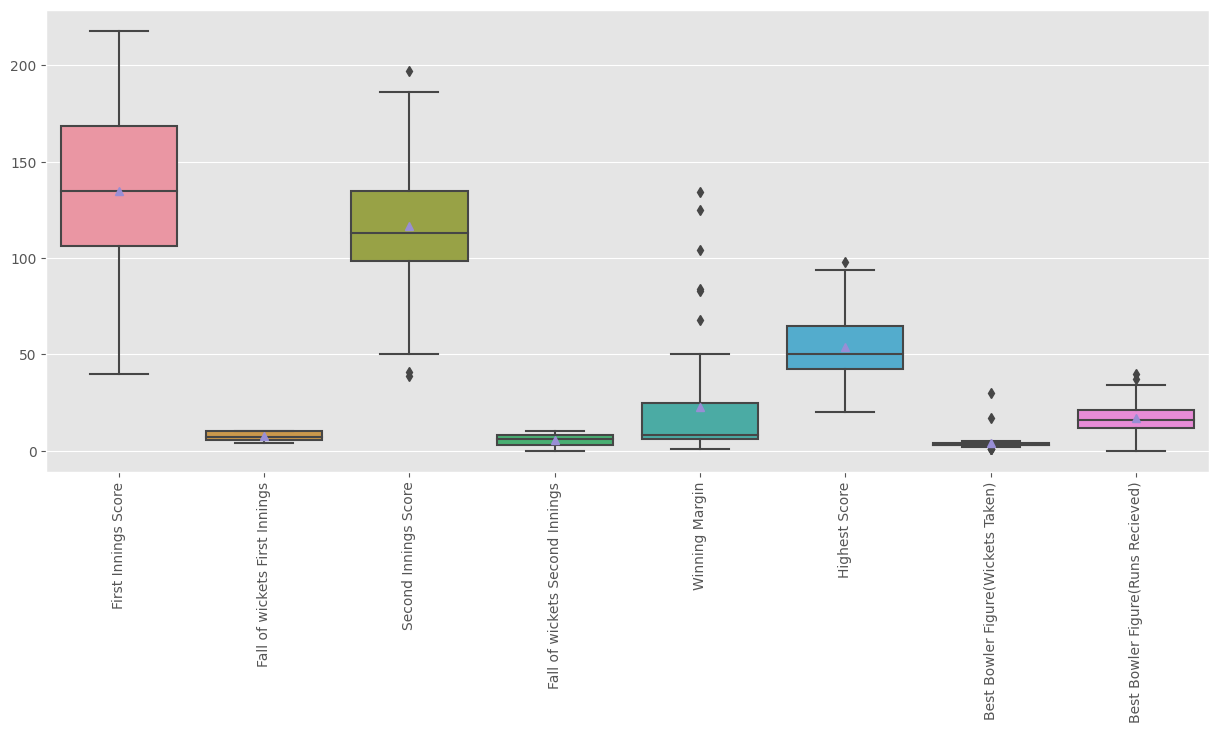

In [19]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(data=df,showmeans=True,orient="v")
plt.xticks(rotation=90)
plt.show()

AS it is visible the mean and mediam value of the first innings score is quite close and the maximum first innings score is more than 200.While the range for the second innnings score is small and maximum value less than 200